<a href="https://colab.research.google.com/github/Hesham-14/Neural-Network-Projects/blob/main/BBCNEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# BBC NEWS RNN ~~ From: Hesham Mohamed Mohamed Mostafa ~~ 8/10/2021

In [1]:
# Importing Required Libraries 
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wger --no-check-certificate \
    /content/bbc-text (1).csv \
    -O /temp/bbc-text.csv

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `wger --no-check-certificate     /content/bbc-text (1).csv     -O /temp/bbc-text.csv'


In [2]:
# Initializing Needed Variables
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = 0.8

In [3]:
# Installing stop-words library
!pip install stop-words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32912 sha256=c755ebc2d0df85587489bd371b8e4d35695e3f3cf034a7afe1da43a84d175722
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [4]:
# defining stopwords
from stop_words import get_stop_words
sentences = []
labels = []
stopwords = get_stop_words('english')
print(len(stopwords))

174


In [6]:
# Examining data
with open("/content/bbc-text (1).csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[1]
    for word in stopwords:
      token = " " + word + " "
      sentence = sentence.replace(token, " ")
    sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. u

In [7]:
# Setting the training and validation sets
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected
# 1096
# 1096
# 1096
# 274
# 274

1780
1780
1780
445
445


In [8]:
# Tokenize training set (sentences, sequences and padding)
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding = padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

444
120
197
120
192
120


In [9]:
# Tokenize validation set (sentences, sequences and padding)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding = padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [10]:
# tokinzing labels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_labels_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_labels_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_labels_seq[0])
print(training_labels_seq[1])
print(training_labels_seq[2])
print(training_labels_seq.shape)

print('\n **** \n')

print(validation_labels_seq[0])
print(validation_labels_seq[1])
print(validation_labels_seq[2])
print(validation_labels_seq.shape)

[4]
[2]
[1]
(1780, 1)

 **** 

[5]
[4]
[3]
(445, 1)


In [16]:
# Compilling the model
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(6, activation='softmax')
                             ])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_7 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [17]:
num_epochs = 30
history = model.fit(train_padded, training_labels_seq, epochs=num_epochs, validation_data=(validation_padded, validation_labels_seq), verbose=2)

Epoch 1/30
56/56 - 1s - loss: 1.7605 - accuracy: 0.3573 - val_loss: 1.7243 - val_accuracy: 0.3708
Epoch 2/30
56/56 - 0s - loss: 1.6760 - accuracy: 0.3545 - val_loss: 1.6267 - val_accuracy: 0.3191
Epoch 3/30
56/56 - 0s - loss: 1.5597 - accuracy: 0.3466 - val_loss: 1.5030 - val_accuracy: 0.4202
Epoch 4/30
56/56 - 0s - loss: 1.4086 - accuracy: 0.5337 - val_loss: 1.3425 - val_accuracy: 0.6899
Epoch 5/30
56/56 - 0s - loss: 1.2132 - accuracy: 0.7753 - val_loss: 1.1456 - val_accuracy: 0.7326
Epoch 6/30
56/56 - 0s - loss: 0.9973 - accuracy: 0.7904 - val_loss: 0.9471 - val_accuracy: 0.8000
Epoch 7/30
56/56 - 0s - loss: 0.7947 - accuracy: 0.8618 - val_loss: 0.7691 - val_accuracy: 0.8472
Epoch 8/30
56/56 - 0s - loss: 0.6251 - accuracy: 0.8966 - val_loss: 0.6247 - val_accuracy: 0.8831
Epoch 9/30
56/56 - 0s - loss: 0.4908 - accuracy: 0.9202 - val_loss: 0.5177 - val_accuracy: 0.8876
Epoch 10/30
56/56 - 0s - loss: 0.3883 - accuracy: 0.9382 - val_loss: 0.4331 - val_accuracy: 0.8944
Epoch 11/30
56/56 -

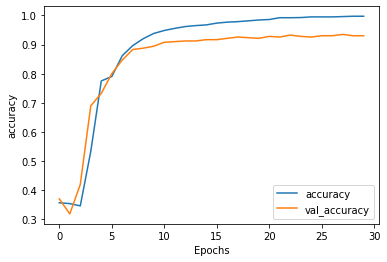

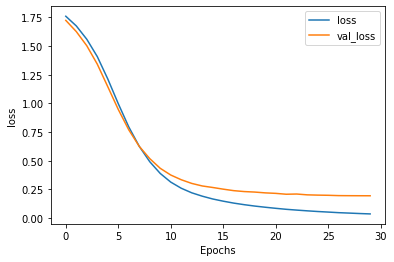

In [43]:
# Plotting training history

import matplotlib.pyplot as plt

# Function that calls the required data from history epochs which had been tested
# and ploting it on two separated Graphs.

# We do this step to check that over model do not overfit or underfit.

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

plot_graph(history, "accuracy")
plot_graph(history, "loss")